## Домашнее задание 5

* Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями
* Добавьте первые разности по стоимости доллара и евро к рублю
* сделайте ее перрасчет (ресемплинг) в представление по неделям.
* Постройте модель предсказания 1-й точки от текущей (h=1).
* Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [3]:
rub_doll=pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.head()

,curs
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [4]:
rub_e=pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e.head()

,curs
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


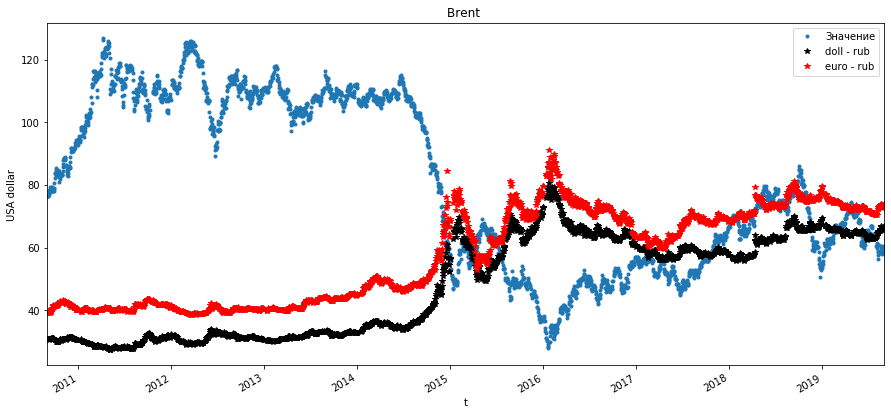

In [5]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.plot(rub_doll.index,rub_doll['curs'].values,'*k', label='doll - rub')
plt.plot(rub_e.index,rub_e['curs'].values,'*r', label='euro - rub')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.legend()
plt.show()

In [6]:
brent_data['Значение'].values[1:] = brent_data['Значение'].values[1:]- brent_data['Значение'].values[:-1]
d_rub_doll = rub_doll['curs'].values[1:]- rub_doll['curs'].values[:-1]
d_rub_e = rub_e['curs'].values[1:]- rub_e['curs'].values[:-1]

In [7]:
brent_data.drop(brent_data.index[0], inplace=True)
brent_data = brent_data.rename(columns={'Значение': 'Значение первой разности'})

In [9]:
rub_doll.drop(rub_doll.index[0], inplace=True)
rub_doll['curs'] = d_rub_doll
rub_doll = rub_doll.rename(columns={'curs': 'first_diff_rub_doll'})

In [11]:
rub_e.drop(rub_e.index[0], inplace=True)
rub_e['curs'] = d_rub_e
rub_e = rub_e.rename(columns={'curs': 'first_diff_rub_e'})

In [16]:
brent_data = pd.merge(brent_data, rub_doll, left_index=True, right_index=True)

In [18]:
brent_data = pd.merge(brent_data, rub_e, left_index=True, right_index=True)

In [19]:
brent_data.head()

,Значение первой разности,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,first_diff_rub_doll,first_diff_rub_e
2010-09-02,0.52,2010,9,2,3,245,35,3,0,0,0,-0.0668,0.1527
2010-09-03,-0.32,2010,9,3,3,246,35,4,0,0,0,-0.1143,0.1247
2010-09-04,0.05,2010,9,4,3,247,35,5,0,0,0,0.0064,0.0604
2010-09-07,0.39,2010,9,7,3,250,36,1,0,0,1,-0.1151,0.1215
2010-09-08,0.67,2010,9,8,3,251,36,2,0,0,0,0.1548,-0.1505


In [20]:
brent_data_w=brent_data.resample("W").apply('mean')

In [24]:
to_drop = ['dayofmonth', 'dayofyear', 'dayofweek', 'is_prev_holiday', 'is_next_holiday']
for col in to_drop:
    brent_data_w.drop(col, axis=1, inplace=True)

In [25]:
brent_data_w.head()

,Значение первой разности,year,month,quarter,weekofyear,is_holiday,first_diff_rub_doll,first_diff_rub_e
2010-09-05,0.083333,2010.0,9.00,3.00,35.0,0.0,-0.058233,0.112600
2010-09-12,0.298000,2010.0,9.00,3.00,36.0,0.0,0.040300,-0.031760
2010-09-19,-0.305000,2010.0,9.00,3.00,37.0,0.0,0.032150,0.281225
2010-09-26,-0.140000,2010.0,9.00,3.00,38.0,0.0,-0.019875,0.181625
2010-10-03,1.417500,2010.0,9.25,3.25,39.0,0.0,-0.108850,0.044825


Признаков немного поэтому сразу перейдем к построению модели

## Построение модели

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scl_target=StandardScaler() 

h=1
target = brent_data["Значение первой разности"].values[h:].reshape((brent_data.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(1756, 1)

In [33]:
scl_x=StandardScaler() 

X = brent_data.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(1756, 13)

In [26]:
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

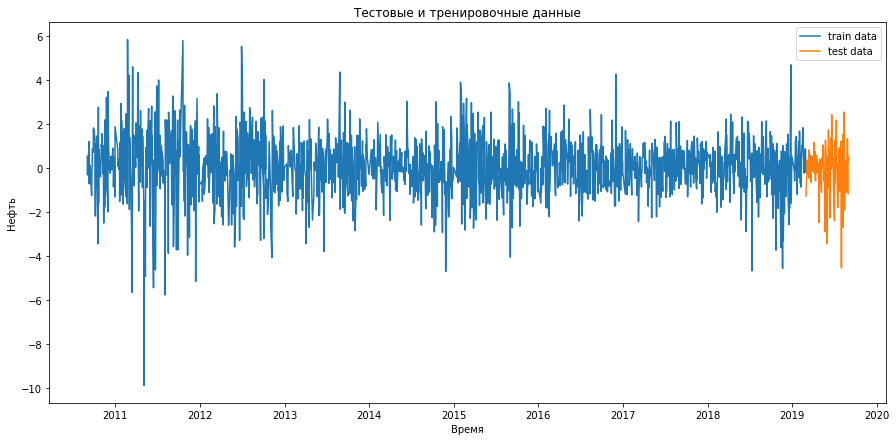

In [27]:
train, test = split_data( brent_data[-2000:], -100)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [34]:
X_train =X[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
model_g = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)

In [37]:
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=15,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [38]:
y_test_pred_g = model_g.predict(X_test)

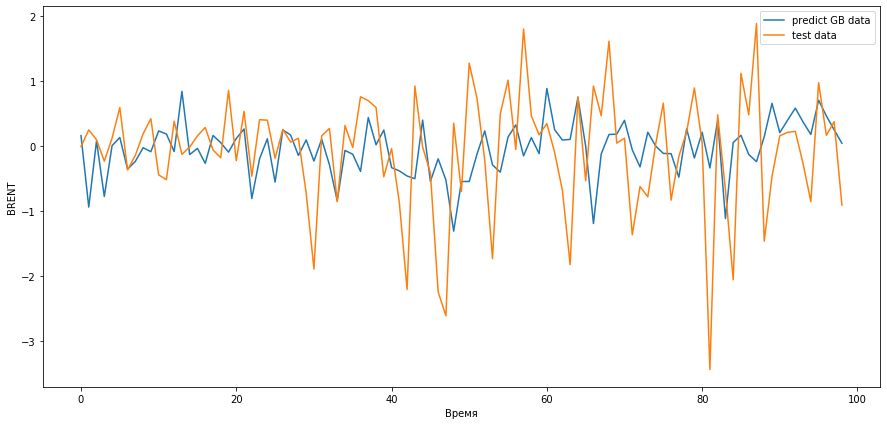

In [39]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g, label='predict GB data' )
plt.plot(y_test, label='test data')

plt.legend()
plt.show()

In [41]:
y_pred_g = model_g.predict(X_train)

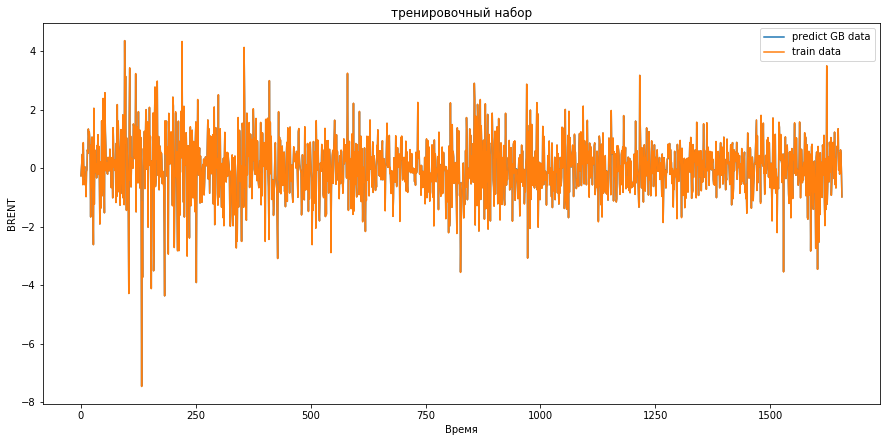

In [43]:
plt.figure( figsize=( 15, 7 ))

plt.title('тренировочный набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_pred_g, label='predict GB data' )
plt.plot(y_train, label='train data')

plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [45]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.8668573432768104 
ошибка mae  :   0.6825492386436282 
оценка R2 :   -0.08602887691552996


In [46]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [47]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   inf %


In [53]:
scl_target.inverse_transform( y_test)[35]

0.0

In [56]:
scl_target.inverse_transform( y_test)[35] - scl_target.inverse_transform( y_test_pred_g)[35] / scl_target.inverse_transform( y_test)[35]

inf

по mse, mae и графику может показаться, что  наша модель как-то работает и предсказывает значения. Однако отрицательное значение коэффициента детерминации говорит о полном отсутствии связи между предсказываемыми и предсказанными значениями. Кроме того абсолютная процентная ошибка ушла в бесконечность, хотя здесь, я думаю, влияет способ ее подсчета и то, что при вычислении одного из слагаемых в знаметеле оказывается 0, из-за которого это и происходит. Затрудняюсь сказать, с чем могут быть связаны такие результаты. Единственное предположение, что производные цен на нефть и курсов действительно вообще никак не зависят друг от друга, но из-за слабых колебаний в течение дня, первые разности у обеих величин колеблются около нуля. Так же колеблются и предсказания нашей модели, создавая иллюзию того, что она работает.